<a href="https://colab.research.google.com/github/parth22X/AIML_Lab_22csu336/blob/main/Exp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

Load the data

In [2]:
data = pd.read_csv('insurance_data.csv')

Check the first few rows of the data

In [3]:
print(data.head())

   age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1


In [4]:
X = data['age'].values.reshape(-1, 1)  # Independent variable (age)
y = data['bought_insurance'].values  # Dependent variable (bought_insurance)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

LogisticRegression()

In [7]:
X_test = np.linspace(min(X_scaled), max(X_scaled), 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of class 1 (insurance bought)

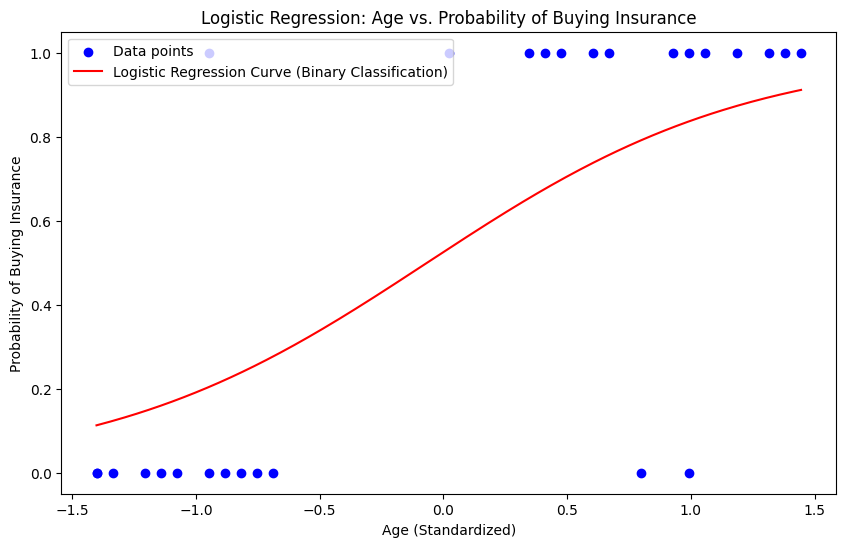

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Data points')
plt.plot(X_test, y_prob, color='red', label='Logistic Regression Curve (Binary Classification)')
plt.xlabel('Age (Standardized)')
plt.ylabel('Probability of Buying Insurance')
plt.title('Logistic Regression: Age vs. Probability of Buying Insurance')
plt.legend()
plt.show()

In [9]:
log_reg_multi = LogisticRegression(multi_class='ovr', solver='liblinear')
ovr_classifier = OneVsRestClassifier(log_reg_multi)
ovr_classifier.fit(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression(multi_class='ovr',
                                                 solver='liblinear'))

In [10]:
y_prob_multi = ovr_classifier.predict_proba(X_test)

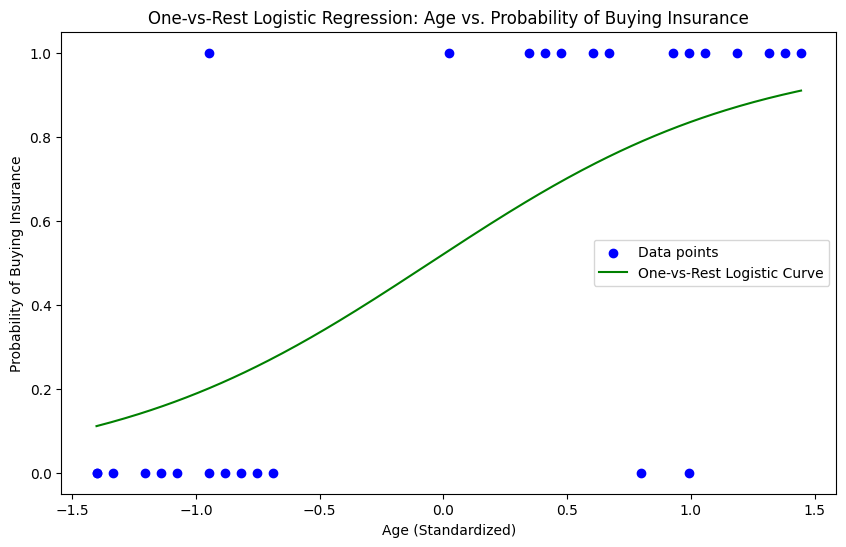

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Data points')
plt.plot(X_test, y_prob_multi[:, 1], color='green', label='One-vs-Rest Logistic Curve')
plt.xlabel('Age (Standardized)')
plt.ylabel('Probability of Buying Insurance')
plt.title('One-vs-Rest Logistic Regression: Age vs. Probability of Buying Insurance')
plt.legend()
plt.show()